In [1]:
using LinearAlgebra
using Random

In [2]:
using Plots

In [3]:
#using Pkg
#Pkg.add("CSV")

In [4]:
#Pkg.add("DataFrames")
#Pkg.add("ImageView")

In [5]:
using Colors

In [6]:
using ImageView

In [7]:
using CSV

In [8]:
using DataFrames

In [9]:
function OMP(b, A, sparsity_level)
    # Orthogonal Matching Pursuit algorithm
    #Input : 
    # b vector to be compressed of size m*1
    # A : dictionary size m*N with m < N
    # sparsity level : number of non zeros coeeficients in the output vector
    # Output : 
    # sparse vector of size N*1
    res = copy(b)
    support = []
    x_s = 0
    for i = 1:sparsity_level
        support = OMP1(A, res , support)
        res, x_s = OMP2(A, b, support)
    end
    x = zeros(size(A)[2])
    x[support] = x_s
    return x
    
end

        
        
    

OMP (generic function with 1 method)

In [10]:
function OMP2(A, b, support)
    # Input
    # A, b : same as above
    # support : indices of non-zeros coefficient
    # Output : 
    # x_s : vectors which minimizes the reconstruction error using only basis vectors in support
    # res : residual ie difference between the vector to be compressed and the reconstructed vector
    # using only basis vectors in support
    A_s = A[:, support]
    x_s = inv(A_s'*A_s) * A_s'*b
    res = b - A_s*x_s
    return res, x_s
end

OMP2 (generic function with 1 method)

In [11]:
function OMP1(A, r, support)
    # Input A, support same as above
    # r : residual
    # add a new vector index to the support. It adds the vector which maximises the normalized dot
    # product between it and the residual. 
    # returns the new support
    max_val = -10^7
    n_max = 0
    for n in 1:size(A)[2]
        if !(n in support)
            an = A[:, n]
            val = an'*r/norm(an)^2
            if val > max_val
                max_val = val
                n_max = n
            end
        end
    end
    support = append!(support, n_max)
    return support
end      

OMP1 (generic function with 1 method)

In [54]:
# test the OMP algorithm on one piece of synthetic data
m = 4 # original size
N = 10 # size of sparse vector
s = 3 # sparsity level
A = randn(m,N) # generate a random dictionnary
b = randn(m) # generate randomly the vector that we want to compress
println("original vector")
println(b)
x_hat = OMP(b, A, s) # compressed sparse vector (10 element including 3 non-zeros)
println("compressed sparse vector")
println(x_hat)
println("reconstructed vector")
print(A*x_hat)

original vector
[-0.34967197959264784, -0.38238235418699557, 0.48445996509738093, -2.087378765410847]
compressed sparse vector
[0.880154495007332, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1882489745359193, 1.109356774089178]
reconstructed vector
[0.07434196690851724, 0.2233193475615194, -0.186668197944801, -1.9365624437594677]

In [43]:
function compression_reconstruction(b, A, s)
    # compress the input vector b using OMP algorithm. Then reconstruct it with the dictionnary 
    # and compare with the original vector (with a l1 norm). 
    # OUT x_hat : sparse vector representing b
    # b_hat : reconstructed vector using sparse vector x_hat
    # error l1 norm between b_hat and b
    x_hat = OMP(b, A, s)
    b_hat = A*x_hat
    error = sum(abs.(b-b_hat))/size(b)[1]
    return x_hat, b_hat, error
end

compression_reconstruction (generic function with 1 method)

In [44]:
function test_OMP_synthetic_data(m, N, s, nb_tests)
    # returns the mean error between the original data generated randomly following gaussian distribution
    # and the reconstructed vector. ie l1_norm(b-b_hat)
    # also returns the average l1 distance between 2 randomly generated gaussian vector for comparaison
    mean_error = 0
    mean_error_random = 0
    for i in 1:nb_tests
        A = randn(m,N)
        b = randn(m)
        b1 = randn(m)
        x_hat, b_hat, error = compression_reconstruction(b, A, s)
        error_random = sum(abs.(b-b1))/size(b)[1]
        mean_error += error
        mean_error_random += error_random
    end
    return mean_error/nb_tests, mean_error_random/nb_tests
end

     
    

test_OMP_synthetic_data (generic function with 1 method)

In [45]:
test_OMP_synthetic_data(m, N, s, 100)

(0.23206249316008074, 1.0822404237213021)

In [46]:
function generate_sparse_vector(size, s)
    # generate randomly a sparse vector of size s with sparsity level s. I don't use it yet but can be useful
    v = zeros(size)
    idxs = shuffle(Vector(1:10))[1:s]
    v[idxs] = randn(s)
    return v
end

generate_sparse_vector (generic function with 1 method)

In [52]:
x = generate_sparse_vector(N, s)
y = A*x
x_hat = OMP(b, A, s)
println("x ", x)
println("x_hat ", x_hat)


x [0.0, 0.0, 0.0, 0.0, 0.17486592526088848, -1.068705429571996, 0.0, 1.6188895139065624, 0.0, 0.0]
x_hat [0.0, -0.3365595301889843, 1.1253136846803402, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.062459999163963276]


In [17]:
df = DataFrame(CSV.File("mnist_test.csv")) # load the mnist data base
df=convert(Matrix,df)

10000×785 Array{Int64,2}:
 7  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 2  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 4  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 4  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 9  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 5  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 9  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 6  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 9  0  0  0  0  0  0  0  0  0  0  0  0

In [18]:
dig = df[5, :] # 5 th digits of the data base
dig = dig[2:size(dig)[1]] # we don't care about the label (first element of the vector)

784-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

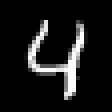

In [32]:
function reshape_(dig)
    return transpose(reshape(dig, (28, 28)))
end

dig_reshaped = reshape_(dig)
imshow(dig_reshaped)
Gray.(dig_reshaped/255)

In [20]:
m = 784 # size of digit (28*28)
N = 2000 # size of sparse vector
A_rd = randn(m,N) # we generate a random dictionnary

784×2000 Array{Float64,2}:
  0.665485  -1.83517    -0.368048   -0.447154   …  -0.974024     -0.779845
 -1.23294    1.4266     -0.418435    1.48857       -0.388748      0.543367
  0.23857    0.518813    0.429761   -0.794383      -1.12312      -0.73399
 -1.13576    0.209961    1.34023    -1.24511       -0.339383     -0.0233507
  0.394063   0.372492   -1.3207     -0.165078      -1.65557       0.158196
  0.963916  -0.249568   -0.352342   -0.25269    …  -0.232488      2.44795
  0.54187   -0.539682   -0.310167   -1.55411       -0.571026      0.211183
 -0.23251   -0.872023   -1.24985    -1.02826       -1.07729       0.605429
 -0.303057   0.235491    1.0203      1.00817        2.84575       0.215911
  0.865931   0.631525   -0.095247   -0.430043       0.493455     -0.0654143
 -0.285714  -1.45697     0.585179    0.423918   …  -0.55176      -0.0591934
  0.11506   -1.19139     0.491708    1.1298        -0.390602     -0.660758
  1.46429    0.492331    1.16305     0.623688      -0.0582414     0.8565

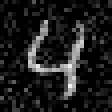

In [35]:
# visualize b_hat for one particular example
_, recons_digit, _ = compression_reconstruction(dig, A_rd, 200)
recons_reshaped = reshape_(recons_digit)
imshow(recons_reshaped)
Gray.(recons_reshaped/255)

In [22]:
function error_wrt_s(A, smin, smax, step)
    # Test the OMP algorithm with different sparsity levels and plot the errr with respect to s
    # IN A : dictionnary
    # smin, smax, step : test value of s between smin and smax separated by step
    s = smin
    ss = []
    errors = []
    
    while s < smax
        println("s=", s)
        _, recons_digit, error = compression_reconstruction(dig, A, s)
        println("error=", error)
        recons_reshaped = reshape(recons_digit, (28, 28))
        err = sum(abs.(recons_digit-dig))/784
        #imshow(recons_reshaped)
        append!(errors, err)
        append!(ss, s)
        #a = Gray.(recons_reshaped/255)
        s = s + step
    end
    plot(ss, errors)
end

error_wrt_s (generic function with 1 method)

s=10
error=36.60317076270604
s=20
error=38.89705607179305
s=30
error=39.877893285194
s=40
error=39.91329603806385
s=50
error=39.59039505048603
s=60
error=39.1579336012233
s=70
error=39.166046526041924
s=80
error=38.40735055130442
s=90
error=37.91117895220428
s=100
error=37.067915103978414
s=110
error=36.58823425598027
s=120
error=36.077311281905736
s=130
error=35.20840174393788
s=140
error=34.58385336571114
s=150
error=33.80852677008009
s=160
error=32.883198981267014
s=170
error=32.0769474724012
s=180
error=31.037742066068468
s=190
error=30.200837185773448
s=200
error=29.426811260294734


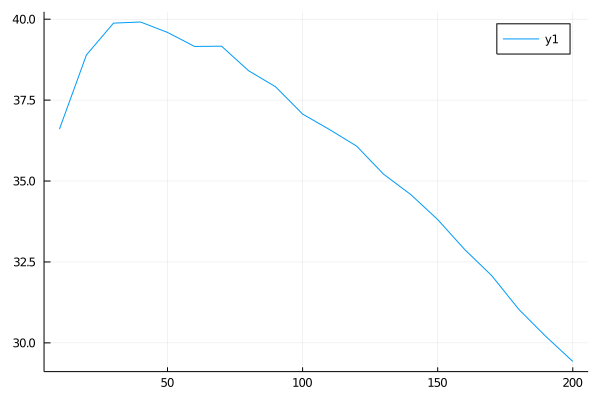

In [23]:
# test different value of s for OMP on random basis
error_wrt_s(A_rd, 10, 210, 10)

We can notice that the error first increases and reach a maximum for s=40, then it decreases more or lesslinearly. It seems not to be a particular case since I observed similar behaviour with other digits. 

The error l1 with s=200 is 30, with a gray color scale between 0 and 255

In [24]:
using ImageView

In [25]:
function cosine_basis(m, N, freq_min, freq_max)
    # generate a cosine dictionary : each column is a cosinus function. The frequency increases with the column index
    # freq_min = frequency of first column , freq_max frequency of last column
    A = zeros(m, N)
    f = 0
    f_step = (freq_max - freq_min)/N
    for t in 1:m
        for j in 1:N
            A[t, j] = cos(2*pi*f*t)
            f = f + f_step
        end
    end
    return A
end


cosine_basis (generic function with 1 method)

In [26]:
m = 784
N = 2000
A_cos = cosine_basis(m, N, 10, 200)

784×2000 Array{Float64,2}:
 1.0        0.827081    0.368125    …  -0.218143   0.368125     0.827081
 1.0        0.368125   -0.728969       -0.904827  -0.728969     0.368125
 1.0       -0.218143   -0.904827        0.612907  -0.904827    -0.218143
 1.0       -0.728969    0.0627905       0.637424   0.0627905   -0.728969
 1.0       -0.987688    0.951057       -0.891007   0.951057    -0.987688
 1.0       -0.904827    0.637424    …  -0.24869    0.637424    -0.904827
 1.0       -0.509041   -0.481754        0.999507  -0.481754    -0.509041
 1.0        0.0627905  -0.992115       -0.187381  -0.992115     0.0627905
 1.0        0.612907   -0.24869        -0.917755  -0.24869      0.612907
 1.0        0.951057    0.809017        0.587785   0.809017     0.951057
 1.0        0.960294    0.844328    …   0.661312   0.844328     0.960294
 1.0        0.637424   -0.187381       -0.876307  -0.187381     0.637424
 1.0        0.0941083  -0.982287       -0.278991  -0.982287     0.0941083
 ⋮                    

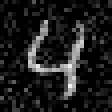

In [55]:
# visualize results on one piece of data with s=150
_, recons_cos, _ = compression_reconstruction(dig, A_cos, 150)
reshaped_cos = reshape_(recons_digit)
Gray.(reshaped_cos/255)

s=10
error=36.60317076270604
s=20
error=38.89705607179305
s=30
error=39.877893285194
s=40
error=39.91329603806385
s=50
error=39.59039505048603
s=60
error=39.1579336012233
s=70
error=39.166046526041924
s=80
error=38.40735055130442
s=90
error=37.91117895220428
s=100
error=37.067915103978414
s=110
error=36.58823425598027
s=120
error=36.077311281905736
s=130
error=35.20840174393788
s=140
error=34.58385336571114
s=150
error=33.80852677008009
s=160
error=32.883198981267014
s=170
error=32.0769474724012
s=180
error=31.037742066068468
s=190
error=30.200837185773448


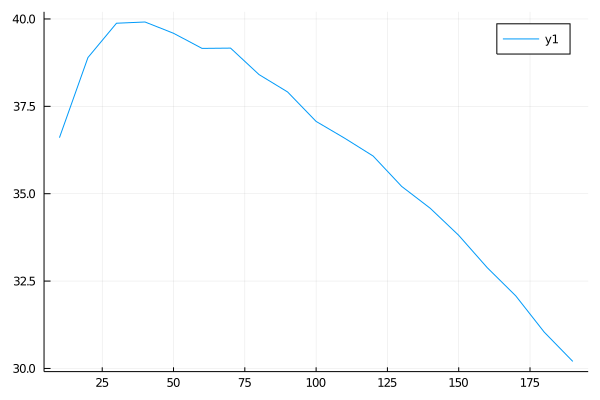

In [28]:
error_wrt_s(A_rd, 10, 200, 10)

Using a cosine basis do not seem to improve the results compared to random